In [1]:
pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [2]:
pip install featurewiz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.5/150.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 10.9 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2436 sha256=f5aa2e00e05682bae44a1f9b0b62650e61815a74a0ba02864e2

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.7 as the correlation limit. Change this limit to fit your needs...
You supplied OneHotEncoder = 
Skipping category encoding since no category encoders specified in input...
    Single_Label Regression problem 
    Loaded train data. Shape = (692, 4)
    Single_Label Regression problem 
loading the entire test dataframe - there is no nrows limit applicable #########
    Loaded test data. Shape = (173, 4)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
###################

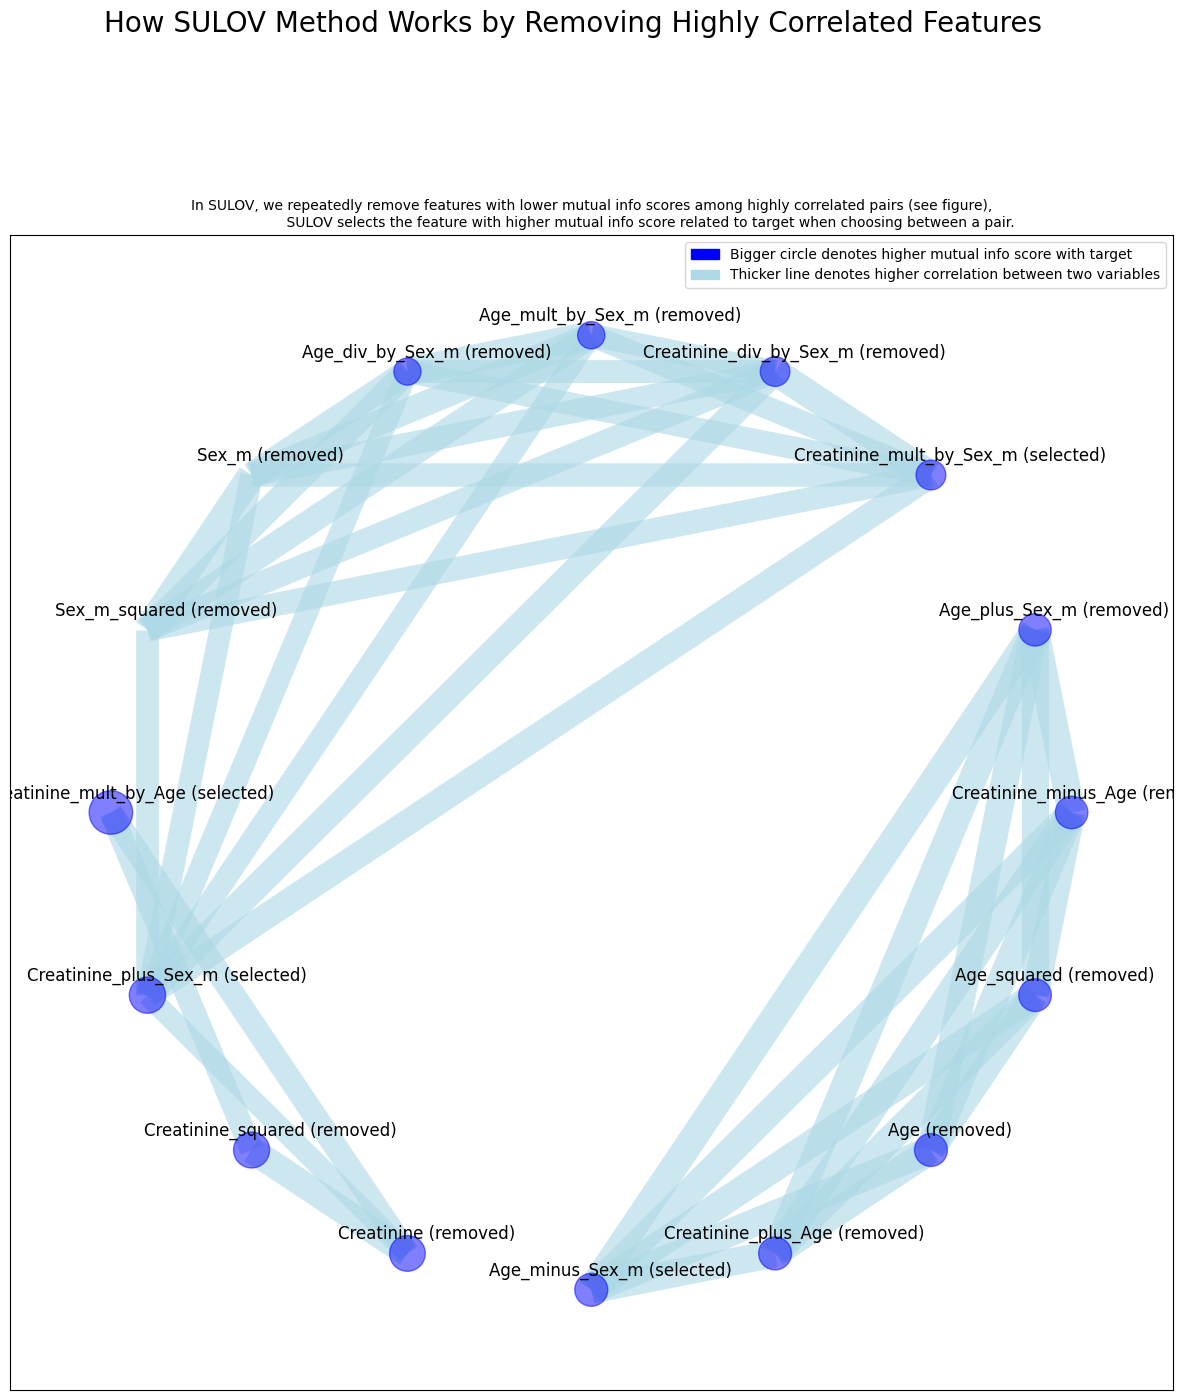

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 6
Final list of selected 6 vars after SULOV = ['Creatinine_div_by_Age', 'Creatinine_minus_Sex_m', 'Creatinine_mult_by_Age', 'Creatinine_plus_Sex_m', 'Age_minus_Sex_m', 'Creatinine_mult_by_Sex_m']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Since ['groupby', 'target', 'interactions'] category encoding is done, dropping original categorical vars from predictors...
    Taking top 2 features per iteration...
    Number of booster rounds = 100
        Selected: ['Creatinine_mult_by_Age', 'Creatinine_div_by_Age']
        Selected: ['Creatinine_mult_by_Age', 'Age_minus_Sex_m']
     

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import save_model, load_model
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_rows', 100000)

from scikeras.wrappers import KerasRegressor
from featurewiz import featurewiz

# Load data
data = pd.read_excel('/content/gfrvaluesv14.xlsx').dropna()
X = data[['Sex', 'Age', 'Creatinine']]
y = data['GFR'].values

# Preprocess data
X['Sex'] = X['Sex'].str.lower()
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)

data = X.copy()
data['GFR'] = y

target = 'GFR'

# Split the data before feature engineering
train, test = train_test_split(data, test_size=0.2, random_state=42)

# Perform feature engineering
train_df_transformed, test_df_transformed = featurewiz(train, target, corr_limit=0.7, verbose=1,
                                                       test_data=test,
                                                       feature_engg=["groupby", "target", 'interactions'],
                                                       OneHotEncoder='')

# Extract the features and target variable
X_train_fw = train_df_transformed.drop(columns=[target])
y_train_fw = train_df_transformed[target]

X_test_fw = test_df_transformed


# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fw)
X_test_scaled = scaler.transform(X_test_fw)

# Print shapes to verify the correct number of features
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")



In [31]:
print(X_test_scaled)

[[ 2.41158645e-01 -6.37565811e-01  1.08006866e+00  5.22363423e-01]
 [ 1.74366210e-01 -7.04473895e-01  1.14853765e+00  4.50075554e-01]
 [-7.01356827e-01  2.21316786e-01 -1.11093907e+00 -8.33034120e-01]
 [-5.06280509e-01  1.00138266e+00 -1.31634605e+00  8.29586866e-01]
 [-5.27131058e-01  6.42808276e-02 -7.68594115e-01 -8.33034120e-01]
 [ 1.97316777e+00  1.47153678e+00  1.89971769e-01  2.56449572e+00]
 [-9.37427444e-01  1.10004712e+00 -1.86409798e+00  4.32003587e-01]
 [ 4.25223874e+00  2.36745853e+00  6.69254711e-01  4.13675687e+00]
 [-9.51210010e-01  1.93637189e+00 -2.06950496e+00  5.94651292e-01]
 [-3.46190704e-01 -5.67779328e-01  1.89971769e-01 -8.33034120e-01]
 [-7.71683254e-01 -6.02199761e-01 -4.94718148e-01 -8.33034120e-01]
 [ 1.00356160e-02 -7.14983267e-01  9.43130678e-01  3.77787685e-01]
 [ 7.67016547e-01 -2.52570894e-01  1.01159967e+00 -8.33034120e-01]
 [ 1.17822350e-01 -6.17367752e-01  9.43130678e-01 -8.33034120e-01]
 [ 2.19792961e+00 -8.16715842e-02  1.83322757e+00  1.64282539e

In [32]:
pip install -q -U keras-tuner

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
import keras_tuner as kt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

def model_builder(hp):
    model = Sequential()
    model.add(Dense(4, input_dim=X_train_scaled.shape[1]))

    hp_activation = hp.Choice('activation', values=['leaky_relu'])
    hp_layer_1 = hp.Int('layer_1', min_value=1, max_value=128, step=1)
    hp_layer_2 = hp.Int('layer_2', min_value=1, max_value=128, step=1)

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    if hp_activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(hp_activation))

    model.add(Dense(units=hp_layer_1))

    if hp_activation == 'leaky_relu':
        model.add(LeakyReLU(alpha=0.01))
    else:
        model.add(tf.keras.layers.Activation(hp_activation))

    model.add(Dense(units=hp_layer_2))

    model.add(Dense(units=1, activation='linear'))

    model.compile(optimizer=tf.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=root_mean_squared_error,  # Using RMSE as the loss
                  metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])

    return model

# Create a new tuner instance
tuner = kt.Hyperband(model_builder,
                     objective=kt.Objective("val_rmse", direction="min"),
                     max_epochs=50,
                     factor=3,
                     overwrite=True)

# Stop early if no improvement
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Run the tuner search
tuner.search(X_train_scaled, y_train_fw, epochs=50, validation_split=0.2, callbacks=[stop_early])


Trial 90 Complete [00h 00m 14s]
val_rmse: 12.372337341308594

Best val_rmse So Far: 11.198257446289062
Total elapsed time: 00h 12m 02s


In [126]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"Best Hyperparameters:")
print(f" - Activation: {best_hps.get('activation')}")
print(f" - Layer 1 units: {best_hps.get('layer_1')}")
print(f" - Layer 2 units: {best_hps.get('layer_2')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

Best Hyperparameters:
 - Activation: leaky_relu
 - Layer 1 units: 15
 - Layer 2 units: 32
 - Learning rate: 0.01


In [127]:
y_test = test['GFR']

In [136]:
modelv2 = tuner.hypermodel.build(best_hps)

# Train the best model
history = modelv2.fit(X_train_scaled, y_train_fw, epochs=100, batch_size=16, validation_split=0.2, callbacks=[stop_early])

# Evaluate the model on the test set
y_pred = modelv2.predict(X_test_scaled).flatten()
rmse_value = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f'Root Mean Squared Error (RMSE) on Test Set: {rmse_value}')

accuracy_range_upper_test = y_test * 1.3
accuracy_range_lower_test = y_test * 0.7
within_accuracy_range_test = np.sum((y_pred >= accuracy_range_lower_test) & (y_pred <= accuracy_range_upper_test))
total_samples_test = len(y_test)
percentage_within_accuracy_range_test = (within_accuracy_range_test / total_samples_test) * 100
print(f'Percentage of predicted values within 30% of true values on Test Set: {percentage_within_accuracy_range_test:.2f}%')



Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 79.0518 - rmse: 79.8022 - val_loss: 34.3635 - val_rmse: 34.9982
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 28.4380 - rmse: 29.2270 - val_loss: 16.4240 - val_rmse: 16.9836
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.5036 - rmse: 14.8085 - val_loss: 12.9213 - val_rmse: 13.1307
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.1462 - rmse: 12.4959 - val_loss: 12.6581 - val_rmse: 12.7946
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.8463 - rmse: 12.1312 - val_loss: 11.5247 - val_rmse: 11.6991
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.4720 - rmse: 12.8210 - val_loss: 11.5426 - val_rmse: 11.7176
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.4489 - rmse: 13.0279 - val_loss: 11.4848 - val_rmse: 11.7087
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12.4940 - rmse: 12.7546 - val_loss: 11.6530 - val_rmse: 11.9413
Epoch 9/100
35/

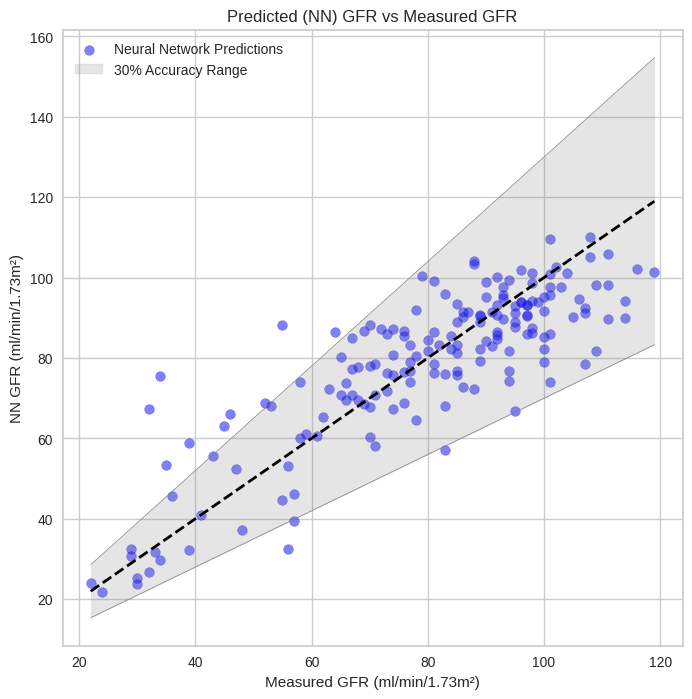

Percentage of predicted values within 30% of true values on Test Set: 93.06%
Mean Bias: -0.7766968170342418
Median Bias: -1.0985183715820312


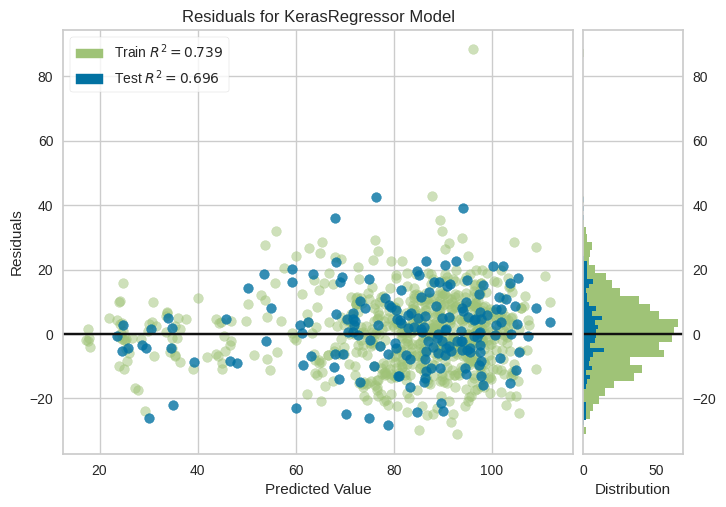

Training R2 Score: 0.7387113673204916
Test R2 Score: 0.6964915287928091
R2 Score Difference: 0.04221983852768252


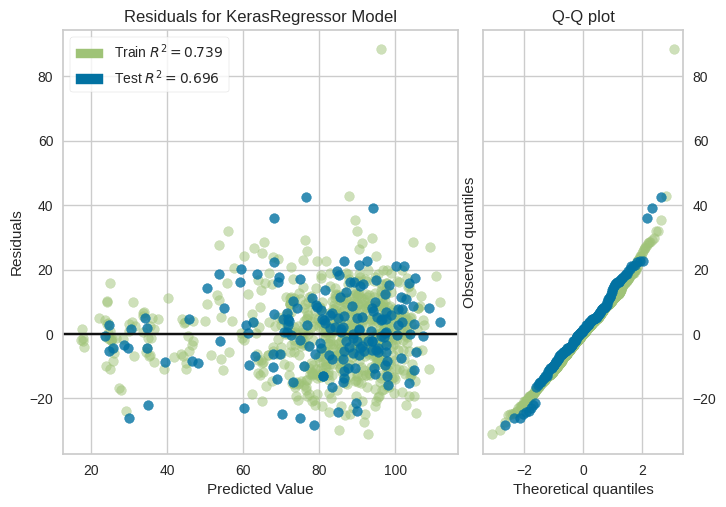

In [139]:


plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Neural Network Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='black', linewidth=2)

x_range = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_range, 1.3 * x_range, color='gray', linestyle='-', linewidth=0.5)
plt.plot(x_range, 0.7 * x_range, color='gray', linestyle='-', linewidth=0.5)
plt.fill_between(x_range, 0.7 * x_range, 1.3 * x_range, color='gray', alpha=0.2, label='30% Accuracy Range')
plt.title('Predicted (NN) GFR vs Measured GFR')
plt.xlabel('Measured GFR (ml/min/1.73m\u00b2)')
plt.ylabel('NN GFR (ml/min/1.73m\u00b2)')

plt.legend()

plt.show()

accuracy_range_upper_test = y_test * 1.3
accuracy_range_lower_test = y_test * 0.7
within_accuracy_range_test = np.sum((y_pred >= accuracy_range_lower_test) & (y_pred <= accuracy_range_upper_test))
total_samples_test = len(y_test)
percentage_within_accuracy_range_test = (within_accuracy_range_test / total_samples_test) * 100
print(f'Percentage of predicted values within 30% of true values on Test Set: {percentage_within_accuracy_range_test:.2f}%')

meanbias = np.mean((y_pred-y_test))
print(f'Mean Bias: {meanbias}')

medianbias = np.median((y_pred -y_test))
print(f'Median Bias: {medianbias}')

keras_regressor = KerasRegressor(model=modelv2, epochs=100, batch_size=16, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=0)
modelv2.compile(optimizer='adam', loss=root_mean_squared_error, metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
# Fit the model (This step might not be necessary if the model is already trained)
keras_regressor.fit(X_train_scaled, y_train_fw)

# Define a function to create a residual plot with histogram
def res_hist_plot(model, X_train_scaled, y_train_fw, X_test_scaled, y_test):
    res_plt = ResidualsPlot(model, train_alpha=0.5, test_alpha=0.8,
                            train_color="g", test_color="b", is_fitted=True)
    res_plt.fit(X_train_scaled, y_train_fw)
    res_plt.score(X_test_scaled, y_test)
    hist_plot = res_plt.show()
    train_r2score = res_plt.train_score_
    test_r2score = res_plt.test_score_
    r2score_diff = train_r2score - test_r2score
    return hist_plot, train_r2score, test_r2score, r2score_diff

# Define a function to create a residual plot with qq plot
def res_qq_plot(model, X_train_scaled, y_train_fw, X_test_scaled, y_test):
    res_plt = ResidualsPlot(model, train_alpha=0.5, test_alpha=0.8,
                            train_color="g", test_color="b", is_fitted=True,
                            hist=False, qqplot=True)
    res_plt.fit(X_train_scaled, y_train_fw)
    res_plt.score(X_test_scaled, y_test)
    qq_plt = res_plt.show()
    return qq_plt

# Create a residual plot with histogram
model_res_hist_plot, model_train_r2score, model_test_r2score, model_r2score_diff = res_hist_plot(keras_regressor,
                                                                                     X_train_scaled,
                                                                                     y_train_fw,
                                                                                     X_test_scaled,
                                                                                     y_test)
print(f"Training R2 Score: {model_train_r2score}")
print(f"Test R2 Score: {model_test_r2score}")
print(f"R2 Score Difference: {model_r2score_diff}")

# Create a residual plot with qq plot
model_res_qq_plot = res_qq_plot(keras_regressor, X_train_scaled, y_train_fw, X_test_scaled, y_test)

In [138]:
modelv2.save("/content/modelv13.keras")